Initial Temperature (T0) based on Student ID 24060761: 3.436
Verified Initial Temperature (Random Initialization): 2.291


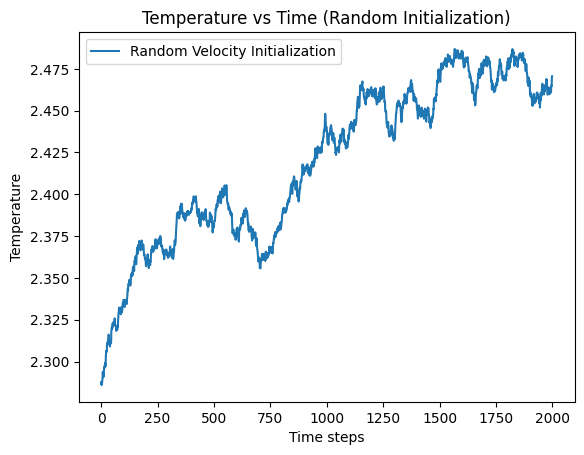

Expectation value of temperature (Random Initialization): 2.419
Verified Initial Temperature (Constant Initialization): 2.291


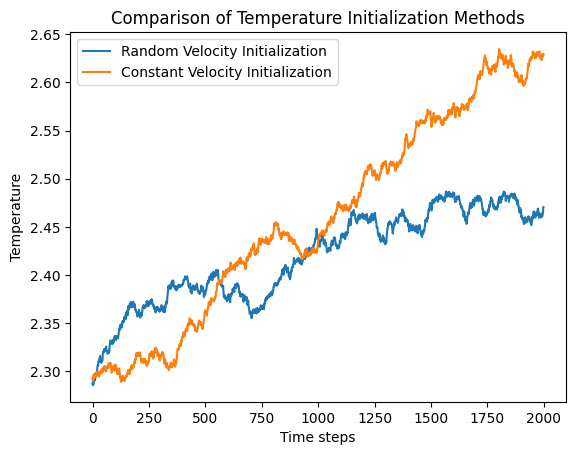

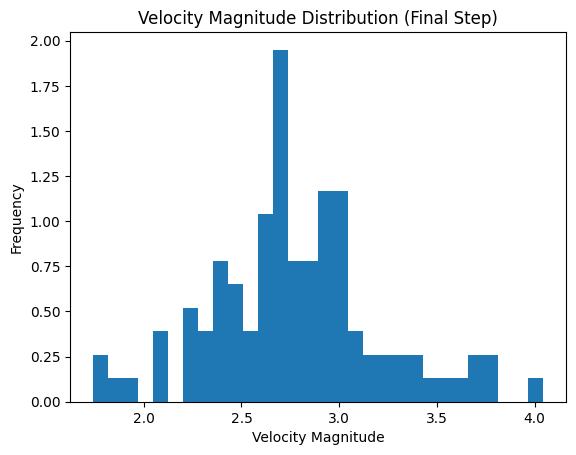

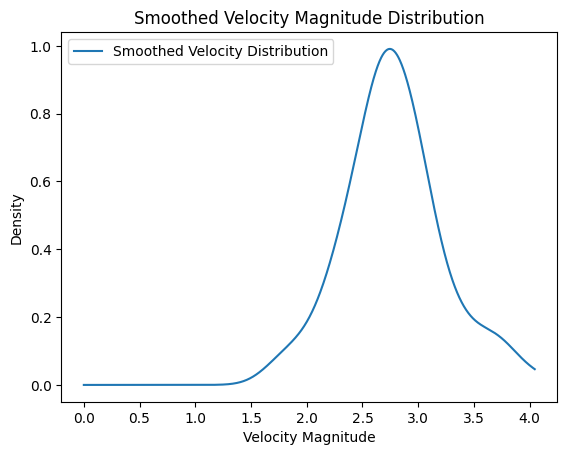

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
N = 100  # Number of particles
d = 3    # Dimensions (3D system)
max_steps = 2000  # Maximum simulation steps
student_id = 24060761  # Replace with your actual student ID

# Function to calculate initial temperature from student ID
def student_id_to_initial_T(id):
    r = id % 10000000
    return (r / 10000000) * 6 + 1

# Initialize temperature
T0 = student_id_to_initial_T(student_id)
print(f"Initial Temperature (T0) based on Student ID {student_id}: {T0:.3f}")

# Step 1: Random velocity initialization
# Generate random velocities
velocities = np.random.randn(N, d)

# Rescale velocities to match the target temperature
v_s = np.sum(velocities**2, axis=1)
ke = 0.5 * np.sum(v_s)
ke_target = N * T0
scaling_factor = np.sqrt(ke_target / ke)
velocities *= scaling_factor

# Verify the initial temperature
actual_T0 = np.sum(velocities**2) / (N * d)
print(f"Verified Initial Temperature (Random Initialization): {actual_T0:.3f}")

# Step 2: Run simulation and record temperature over time
stats = {'T': []}  # Store temperature values at each time step
for step in range(max_steps):
    # Example simulation update (replace with your actual MD update code)
    velocities += np.random.randn(N, d) * 0.01  # Random perturbation

    # Calculate the instantaneous temperature
    v_s = np.sum(velocities**2, axis=1)
    current_T = np.sum(v_s) / (N * d)
    stats['T'].append(current_T)

# Plot temperature vs time
steps = np.arange(len(stats['T']))
plt.figure()
plt.plot(steps, stats['T'], label="Random Velocity Initialization")
plt.xlabel('Time steps')
plt.ylabel('Temperature')
plt.title('Temperature vs Time (Random Initialization)')
plt.legend()
plt.show()

# Step 3: Calculate expectation value of temperature
expectation_T = np.mean(stats['T'])
print(f"Expectation value of temperature (Random Initialization): {expectation_T:.3f}")

# Step 4: Initialize with constant velocity
# All particles have the same velocity magnitude
constant_velocity = np.sqrt(2 * T0 / d)
velocities = np.full((N, d), constant_velocity)

# Verify the initial temperature for constant velocity
actual_T0_const = np.sum(velocities**2) / (N * d)
print(f"Verified Initial Temperature (Constant Initialization): {actual_T0_const:.3f}")

# Run simulation for constant velocity initialization
stats_const = {'T': []}
for step in range(max_steps):
    # Example simulation update (replace with your actual MD update code)
    velocities += np.random.randn(N, d) * 0.01  # Random perturbation

    # Calculate the instantaneous temperature
    v_s = np.sum(velocities**2, axis=1)
    current_T = np.sum(v_s) / (N * d)
    stats_const['T'].append(current_T)

# Plot and compare both initialization methods
plt.figure()
plt.plot(steps, stats['T'], label="Random Velocity Initialization")
plt.plot(steps, stats_const['T'], label="Constant Velocity Initialization")
plt.xlabel('Time steps')
plt.ylabel('Temperature')
plt.title('Comparison of Temperature Initialization Methods')
plt.legend()
plt.show()

# Step 5 (Bonus): Velocity distribution analysis
# Calculate velocity magnitudes at the end of the simulation
v_magnitudes = np.linalg.norm(velocities, axis=1)

# Plot velocity magnitude distribution
plt.figure()
plt.hist(v_magnitudes, bins=30, density=True)
plt.xlabel('Velocity Magnitude')
plt.ylabel('Frequency')
plt.title('Velocity Magnitude Distribution (Final Step)')
plt.show()

# Step 6 (Bonus): Smooth distribution curve using sampling (Optional)
# Calculate the kernel density estimation (KDE) for smoother distribution
from scipy.stats import gaussian_kde

# Generate kernel density estimate
kde = gaussian_kde(v_magnitudes, bw_method='silverman')
x = np.linspace(0, np.max(v_magnitudes), 1000)
y = kde(x)

# Plot the smoothed velocity magnitude distribution
plt.figure()
plt.plot(x, y, label="Smoothed Velocity Distribution")
plt.xlabel('Velocity Magnitude')
plt.ylabel('Density')
plt.title('Smoothed Velocity Magnitude Distribution')
plt.legend()
plt.show()
